In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import socket as socket
import os as os
import sys as sys
import multiprocessing as mp

### For Arial Font
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'   # Set the defaul
### Make sure to have the font installed (it is on cluster for Harald)
rcParams['font.sans-serif'] = ['Arial']

socket_name = socket.gethostname()
print(socket_name)

if socket_name.startswith("compute-"):
    print("HSM O2 Computational partition detected.")
    path = "/n/groups/reich/hringbauer/git/hapBLOCK/"  # The Path on Harvard Cluster
else: 
    raise RuntimeWarning("Not compatible machine. Check!!")

os.chdir(path)  # Set the right Path (in line with Atom default)

print(os.getcwd())
print(f"CPU Count: {mp.cpu_count()}")

compute-e-16-233.o2.rc.hms.harvard.edu
HSM O2 Computational partition detected.
/n/groups/reich/hringbauer/git/hapBLOCK
CPU Count: 28


In [2]:
def load_ibd(out_folder = "/n/groups/reich/hringbauer/git/hapBLOCK/output/pedsim/",
             file="av2.tsv", skip_rows=False):
    df = pd.read_csv(out_folder + file, sep="\t")
    if skip_rows:
        df = df[::2]
    return df

def plot_scatter_ibd(ax =0, df_ibds=[], min_cm=12, s=40,
                     c="deepskyblue", m="o", label="",
                     xlim=[-5,3600], ylim=[0,55], savepath="", show=False, ec="gray"):
    """Plot Scatter Plot of IBD"""
    if ax==0:
        plt.figure(figsize=(8,8))
        ax = plt.gca()
    
    ### Do the actual Plot
    ax.scatter(df_ibds[f"sum_IBD>{min_cm}"], df_ibds[f"n_IBD>{min_cm}"], s=s,
               ec=ec, linewidth=0.5, color=c, marker=m, label=label)

    ax.set_xlabel(f"Sum IBD >{min_cm}cM [cM]", fontsize=14)
    ax.set_ylabel(f"n IBD >{min_cm}cM [cM]", fontsize=14)
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    
    if len(savepath)>0:
        plt.savefig(savepath, bbox_inches ='tight', pad_inches = 0, dpi=400)
        print(f"Saved to {savepath}")
    if show:
        plt.show()

In [3]:
files_gp = ["gp1.tsv", "gp2.tsv", "gp3.tsv"]
files_av = ["av1.tsv", "av2.tsv", "av3.tsv", "av4.tsv", "av5.tsv"]
files_sibs = ["sib.tsv", "hsib.tsv"]
out_folder = "/n/groups/reich/hringbauer/git/hapBLOCK/output/pedsim/"

df_gps = [load_ibd(file=f, out_folder=out_folder,
                   skip_rows=True) for f in files_gp]

df_avs = [load_ibd(file=f, out_folder=out_folder) for f in files_av]
df_sibs = load_ibd(file=files_sibs[0], out_folder=out_folder)
df_hsibs = load_ibd(file=files_sibs[1], out_folder=out_folder)

df_par = load_ibd(file="parent.tsv", out_folder=out_folder)[1:2]

In [15]:
len(df_sibs)

100

# Do the Plot

In [4]:
df_ibds = pd.read_csv("/n/groups/reich/hringbauer/git/ibd_euro/output/ibd/ibd220.all.v1.tsv", 
                      sep="\t") # compression='gzip'

len(df_ibds)

146117

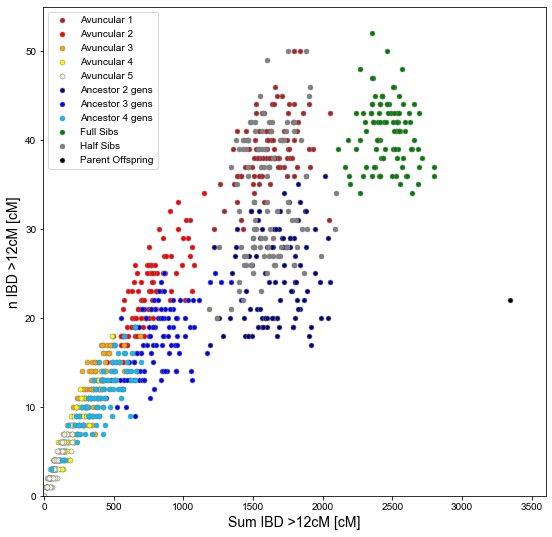

In [5]:
plt.figure(figsize=(9,9))

ax = plt.gca()

plot_scatter_ibd(ax=ax, df_ibds=df_avs[0], show=False, label="Avuncular 1", 
                 c="firebrick", s=25)
plot_scatter_ibd(ax=ax, df_ibds=df_avs[1], show=False, label="Avuncular 2", 
                 c="red", s=25)
plot_scatter_ibd(ax=ax, df_ibds=df_avs[2], show=False, label="Avuncular 3", 
                 c="orange", s=25)
plot_scatter_ibd(ax=ax, df_ibds=df_avs[3], show=False, label="Avuncular 4", 
                 c="yellow", s=25)
plot_scatter_ibd(ax=ax, df_ibds=df_avs[4], show=False, label="Avuncular 5", 
                 c="beige", s=25)

plot_scatter_ibd(ax=ax, df_ibds=df_gps[0], show=False, label="Ancestor 2 gens", 
                 c="navy", s=25)
plot_scatter_ibd(ax=ax, df_ibds=df_gps[1], show=False, label="Ancestor 3 gens", 
                 c="blue", s=25)
plot_scatter_ibd(ax=ax, df_ibds=df_gps[2], show=False, label="Ancestor 4 gens", 
                 c="deepskyblue", s=25)

plot_scatter_ibd(ax=ax, df_ibds=df_sibs, show=False, label="Full Sibs", 
                 c="green", s=25)
plot_scatter_ibd(ax=ax, df_ibds=df_hsibs, show=False, label="Half Sibs", 
                 c="gray", s=25)
plot_scatter_ibd(ax=ax, df_ibds=df_par, show=False, label="Parent Offspring", 
                 c="black", s=25)


#plot_scatter_ibd(ax=ax, df_ibds=df_ibds, show=False, label="V43.all data", s=30)

ax.legend(loc="upper left")
plt.savefig("./figs/pedsim/simulated_pedsim.png", bbox_inches ='tight', pad_inches = 0, dpi=400)
plt.show()

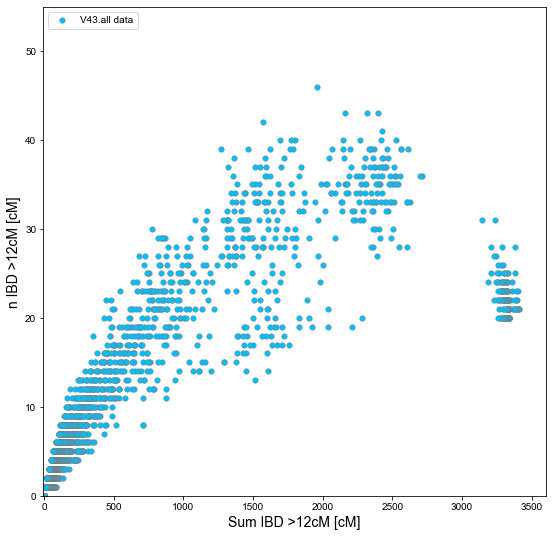

In [6]:
plt.figure(figsize=(9,9))

ax = plt.gca()
plot_scatter_ibd(ax=ax, df_ibds=df_ibds, show=False, label="V43.all data", s=30)
ax.legend(loc="upper left")

plt.savefig("./figs/pedsim/v43.all.png", bbox_inches ='tight', pad_inches = 0, dpi=400)

plt.show()

# Plot Sub Dataframe

In [11]:
df_meta = pd.read_csv("/n/groups/reich/hringbauer/git/ibd_euro/data/iid_lists/iid_ibd_v53.1.tsv", sep="\t")

## Could merge onto IBD Dataframe if needed
#new_columns(df_ibds, df_meta, col = ["Mean date", "Group name", "Publication"]) #"clst"

8818

# Plot ancIBD European run versus PED_SIM [main figure paper]

In [9]:
df_ibds = pd.read_csv("/n/groups/reich/hringbauer/git/ibd_euro/output/ibd/ibd220.ind.v53.1.tsv", 
                      sep="\t") # compression='gzip'
print(f"Loaded {len(df_ibds)} IBD segments")


### Load Pedsim
files_gp = ["gp1.tsv", "gp2.tsv", "gp3.tsv"]
files_av = ["av1.tsv", "av2.tsv", "av3.tsv", "av4.tsv", "av5.tsv"]
files_sibs = ["sib.tsv", "hsib.tsv"]
out_folder = "/n/groups/reich/hringbauer/git/hapBLOCK/output/pedsim/"

df_gps = [load_ibd(file=f, out_folder=out_folder,
                   skip_rows=True) for f in files_gp]

df_avs = [load_ibd(file=f, out_folder=out_folder) for f in files_av]
df_sibs = load_ibd(file=files_sibs[0], out_folder=out_folder)
df_hsibs = load_ibd(file=files_sibs[1], out_folder=out_folder)

df_par = load_ibd(file="parent.tsv", out_folder=out_folder)[1:2]

Loaded 328726 IBD segments


Saved to ./figs/scatter/ibd.v53.1.png


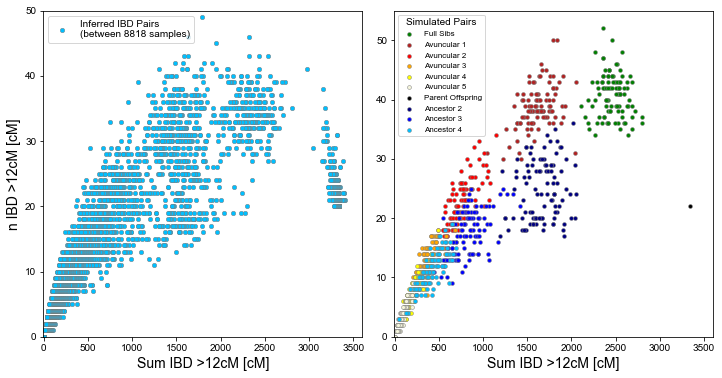

In [16]:
ylim = [0,55]
savepath = "./figs/scatter/ibd.v53.1.png"

fig =plt.figure(figsize=(12,6))
gs = fig.add_gridspec(nrows=1, ncols=2, wspace=0.1)

ax1 = fig.add_subplot(gs[0])
ax = fig.add_subplot(gs[1])

#ax = plt.gca()

s=15
plot_scatter_ibd(ax=ax, df_ibds=df_sibs, show=False, label="Full Sibs", 
                 c="green", s=s)
plot_scatter_ibd(ax=ax, df_ibds=df_avs[0], show=False, label="Avuncular 1", 
                 c="firebrick", s=s)
plot_scatter_ibd(ax=ax, df_ibds=df_avs[1], show=False, label="Avuncular 2", 
                 c="red", s=s)
plot_scatter_ibd(ax=ax, df_ibds=df_avs[2], show=False, label="Avuncular 3", 
                 c="orange", s=s)
plot_scatter_ibd(ax=ax, df_ibds=df_avs[3], show=False, label="Avuncular 4", 
                 c="yellow", s=s)
plot_scatter_ibd(ax=ax, df_ibds=df_avs[4], show=False, label="Avuncular 5", 
                 c="beige", s=s)

m_anc = "o"
plot_scatter_ibd(ax=ax, df_ibds=df_par, show=False, label="Parent Offspring", 
                 c="black", s=s, m=m_anc)
plot_scatter_ibd(ax=ax, df_ibds=df_gps[0], show=False, label="Ancestor 2", 
                 c="navy", s=s, m=m_anc)
plot_scatter_ibd(ax=ax, df_ibds=df_gps[1], show=False, label="Ancestor 3", 
                 c="blue", s=s, m=m_anc)
plot_scatter_ibd(ax=ax, df_ibds=df_gps[2], show=False, label="Ancestor 4", 
                 c="deepskyblue", s=s, m=m_anc)

#plot_scatter_ibd(ax=ax, df_ibds=df_hsibs, show=False, label="Half Sibs", 
#                 c="gray", s=25)


#plot_scatter_ibd(ax=ax, df_ibds=df_ibds, show=False, label="V43.all data", s=30)
ax.set_ylabel("")
ax.set_ylim(ylim)
#ax.set_title("Simulated IBD")

ax.legend(loc="upper left", title="Simulated Pairs", fontsize=8)

### Do the real data
plot_scatter_ibd(ax=ax1, df_ibds=df_ibds, show=False, label=f"Inferred IBD Pairs \n(between {len(df_meta)} samples)", s=20)
ax1.legend(loc="upper left")
ax1.set_ylim([0,50])

if len(savepath)>0:
    plt.savefig(savepath, bbox_inches ='tight', pad_inches = 0, dpi=400)
    print(f"Saved to {savepath}")
    
plt.show()

# Area 51

In [77]:
df_ibds2 = df_ibds[df_ibds["sum_IBD>12"]>3000]

In [ ]:
df_ibds2.sort_values(by="n_IBD>12", ascending=False)[:50]

In [ ]:
sys.path.insert(0,"/n/groups/reich/hringbauer/git/hapBLOCK/python3/")  # hack to get development package first in path
from ibd_stats.funcs import new_columns, find_relatives, give_sub_df